Частина друга: Аналіз файлів

​

Проведіть аналіз файлу 2017_jun_final.csv. Файл містить результати опитування розробників у червні 2017 року.



Необхідно виконати:



Прочитайте файл 2017_jun_final.csv за допомогою методу read_csv
Прочитайте отриману таблицю, використовуючи метод head
Визначте розмір таблиці за допомогою методу shape
Визначте типи всіх стовпців за допомогою dataframe.dtypes
Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)
Видаліть усі стовпці з пропусками, крім стовпця "Мова програмування"
Знову порахуйте, яка частка пропусків міститься в кожній колонці і переконайтеся, що залишився тільки стовпець "Мова.програмування"
Видаліть усі рядки у вихідній таблиці за допомогою методу dropna
Визначте новий розмір таблиці за допомогою методу shape
Створіть нову таблицю python_data, в якій будуть тільки рядки зі спеціалістами, які вказали мову програмування Python
Визначте розмір таблиці python_data за допомогою методу shape
Використовуючи метод groupby, виконайте групування за стовпчиком "Посада"
Створіть новий DataFrame, де для згрупованих даних за стовпчиком "Посада", виконайте агрегацію даних за допомогою методу agg і знайдіть мінімальне та максимальне значення у стовпчику "Зарплата.в.місяць"
Створіть функцію fill_avg_salary, яка повертатиме середнє значення заробітної плати на місяць. Використовуйте її для методу apply та створіть новий стовпчик "avg"
Створіть описову статистику за допомогою методу describe для нового стовпчика.
Збережіть отриману таблицю в CSV файл


## Імпортуємо бібліотеки


In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt

## Прочитайте файл 2017_jun_final.csv за допомогою методу read_csv. Прочитайте отриману таблицю, використовуючи метод head


In [2]:
def convert_google_sheet_url(url):
    # Regular expression to match and capture the necessary part of the URL
    pattern = r'https://docs\.google\.com/spreadsheets/d/([a-zA-Z0-9-_]+)(/edit#gid=(\d+)|/edit.*)?'

    # Replace function to construct the new URL for CSV export
    # If gid is present in the URL, it includes it in the export URL, otherwise, it's omitted
    replacement = lambda m: f'https://docs.google.com/spreadsheets/d/{m.group(1)}/export?' + (f'gid={m.group(3)}&' if m.group(3) else '') + 'format=csv'

    # Replace using regex
    new_url = re.sub(pattern, replacement, url)

    return new_url

url='https://docs.google.com/spreadsheets/d/1bclX5PbqE8zR1-wOSM3ZTFa53sIC7RXqwty7Abmw9yQ/edit#gid=1724592523'
new_url = convert_google_sheet_url(url)
#print(new_url)

df = pd.read_csv(new_url)
print(df.head())

   N                    Посада Мова програмування Спеціалізація  \
0  1        Junior QA engineer                NaN     Manual QA   
1  2        Junior QA engineer                NaN     Manual QA   
2  3         Software Engineer            C#/.NET           NaN   
3  4         Software Engineer         JavaScript           NaN   
4  5  Senior Software Engineer         JavaScript           NaN   

  Загальний досвід роботи Досвід роботи на поточному місці  \
0                     0.5                              0.5   
1         менше 3 місяців                  менше 3 місяців   
2                       4                                1   
3                       5                                4   
4       10 і більше років                              0.5   

   Зарплата на місяць  Зміна зарплати за 12 місяців   Місто   Розмір компанії  \
0                 400                             0  Харків        до 10 осіб   
1                 430                           130  Харків  б

## Визначте розмір таблиці за допомогою методу shape

In [3]:
size = df.shape
print(size)

(8704, 25)


## Визначте типи всіх стовпців за допомогою dataframe.dtypes

In [4]:
col_types = df.dtypes
print(col_types)

N                                     int64
Посада                               object
Мова програмування                   object
Спеціалізація                        object
Загальний досвід роботи              object
Досвід роботи на поточному місці     object
Зарплата на місяць                    int64
Зміна зарплати за 12 місяців          int64
Місто                                object
Розмір компанії                      object
Тип компанії                         object
Стать                                object
Вік                                   int64
Освіта                               object
Університет                          object
Ще студент                             bool
Рівень англійської                   object
Предметна область                    object
Дата заповнення                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary                          

## Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)


In [5]:
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

missing_values_proportion = missing_values / df.shape[0]
print("\n",missing_values_proportion)

Missing values:
 N                                      0
Посада                                 0
Мова програмування                  3850
Спеціалізація                       7219
Загальний досвід роботи                0
Досвід роботи на поточному місці       0
Зарплата на місяць                     0
Зміна зарплати за 12 місяців           0
Місто                                  0
Розмір компанії                        0
Тип компанії                           0
Стать                                  0
Вік                                    0
Освіта                                 0
Університет                          358
Ще студент                             0
Рівень англійської                     0
Предметна область                    223
Дата заповнення                        0
User.Agent                             0
exp                                    0
current_job_exp                        0
salary                                 0
Валюта                              8694

## Видаліть усі стовпці з пропусками, крім стовпця "Мова програмування"

In [6]:
# Identify columns with missing values
columns_with_missing_values = df.columns[df.isnull().any()].tolist()
print(columns_with_missing_values)
# Delete colums Мова програмування from list
columns_to_drop = [col for col in columns_with_missing_values if col != "Мова програмування"]
print(columns_to_drop)
# Drop columns
df.drop(columns=columns_to_drop, inplace=True)

# Print the modified DataFrame
print(df.head())

['Мова програмування', 'Спеціалізація', 'Університет', 'Предметна область', 'Валюта', 'cls']
['Спеціалізація', 'Університет', 'Предметна область', 'Валюта', 'cls']
   N                    Посада Мова програмування Загальний досвід роботи  \
0  1        Junior QA engineer                NaN                     0.5   
1  2        Junior QA engineer                NaN         менше 3 місяців   
2  3         Software Engineer            C#/.NET                       4   
3  4         Software Engineer         JavaScript                       5   
4  5  Senior Software Engineer         JavaScript       10 і більше років   

  Досвід роботи на поточному місці  Зарплата на місяць  \
0                              0.5                 400   
1                  менше 3 місяців                 430   
2                                1                2500   
3                                4                2000   
4                              0.5                4500   

   Зміна зарплати за 12 

## Знову порахуйте, яка частка пропусків міститься в кожній колонці і переконайтеся, що залишився тільки стовпець "Мова.програмування"

In [7]:
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

missing_values_proportion = missing_values / df.shape[0]
print("\n",missing_values_proportion)

Missing values:
 N                                      0
Посада                                 0
Мова програмування                  3850
Загальний досвід роботи                0
Досвід роботи на поточному місці       0
Зарплата на місяць                     0
Зміна зарплати за 12 місяців           0
Місто                                  0
Розмір компанії                        0
Тип компанії                           0
Стать                                  0
Вік                                    0
Освіта                                 0
Ще студент                             0
Рівень англійської                     0
Дата заповнення                        0
User.Agent                             0
exp                                    0
current_job_exp                        0
salary                                 0
dtype: int64

 N                                   0.000000
Посада                              0.000000
Мова програмування                  0.442325
Загальний дос

## Видаліть усі рядки у вихідній таблиці за допомогою методу dropna

In [8]:

df.dropna(axis=0, inplace=True)

print(df.head())

   N                    Посада Мова програмування Загальний досвід роботи  \
2  3         Software Engineer            C#/.NET                       4   
3  4         Software Engineer         JavaScript                       5   
4  5  Senior Software Engineer         JavaScript       10 і більше років   
6  7  Junior Software Engineer            C#/.NET                       1   
7  8  Senior Software Engineer                C++                       6   

  Досвід роботи на поточному місці  Зарплата на місяць  \
2                                1                2500   
3                                4                2000   
4                              0.5                4500   
6                  менше 3 місяців                 600   
7                                1                3300   

   Зміна зарплати за 12 місяців         Місто Розмір компанії   Тип компанії  \
2                           800          Київ    до 1000 осіб  Аутсорсингова   
3                           

## Визначте новий розмір таблиці за допомогою методу shape

In [9]:
print(df.shape)

(4854, 20)


## Створіть нову таблицю python_data, в якій будуть тільки рядки зі спеціалістами, які вказали мову програмування Python

In [10]:
python_data = df[df["Мова програмування"] == "Python"]
print(python_data.head())

       N                    Посада Мова програмування Загальний досвід роботи  \
12    13         Software Engineer             Python                       1   
68    69         Software Engineer             Python                     1.5   
87    88  Junior Software Engineer             Python                     0.5   
114  115  Junior Software Engineer             Python                     1.5   
143  144  Junior Software Engineer             Python                       1   

    Досвід роботи на поточному місці  Зарплата на місяць  \
12                   менше 3 місяців                 800   
68                               0.5                 900   
87                               0.5                 600   
114                              0.5                 685   
143                                1                 750   

     Зміна зарплати за 12 місяців Місто Розмір компанії   Тип компанії  \
12                            200  Київ      до 50 осіб  Аутсорсингова   
68  

## Визначте розмір таблиці python_data за допомогою методу shape

In [11]:
print(python_data.shape)

(207, 20)


## Використовуючи метод groupby, виконайте групування за стовпчиком "Посада"

In [12]:
grouped_data = python_data.groupby("Посада")
print(grouped_data.size())

Посада
Junior Software Engineer     63
Senior Software Engineer     31
Software Engineer           100
System Architect              2
Technical Lead               11
dtype: int64


## Створіть новий DataFrame, де для згрупованих даних за стовпчиком "Посада", виконайте агрегацію даних за допомогою методу agg і знайдіть мінімальне та максимальне значення у стовпчику "Зарплата.в.місяць"

In [13]:
aggregated_data = grouped_data.agg(min_salary=pd.NamedAgg(column="Зарплата на місяць", aggfunc="min"),
                                           max_salary=pd.NamedAgg(column="Зарплата на місяць", aggfunc="max"))

print(aggregated_data)

                          min_salary  max_salary
Посада                                          
Junior Software Engineer         100        1250
Senior Software Engineer        1300        9200
Software Engineer                500        5400
System Architect                3000        5000
Technical Lead                  1425        6200


## Створіть функцію fill_avg_salary, яка повертатиме середнє значення заробітної плати на місяць. Використовуйте її для методу apply та створіть новий стовпчик "avg"

In [14]:
def fill_avg_salary(row):
    avg_salary = (row['min_salary'] + row['max_salary']) / 2
    return avg_salary

aggregated_data['avg'] = aggregated_data.apply(fill_avg_salary, axis=1)

print(aggregated_data)


                          min_salary  max_salary     avg
Посада                                                  
Junior Software Engineer         100        1250   675.0
Senior Software Engineer        1300        9200  5250.0
Software Engineer                500        5400  2950.0
System Architect                3000        5000  4000.0
Technical Lead                  1425        6200  3812.5


## Створіть описову статистику за допомогою методу describe для нового стовпчика.

In [15]:
print(aggregated_data['avg'].describe())

count       5.000000
mean     3337.500000
std      1700.091909
min       675.000000
25%      2950.000000
50%      3812.500000
75%      4000.000000
max      5250.000000
Name: avg, dtype: float64


## Збережіть отриману таблицю в CSV файл

In [16]:
aggregated_data.to_csv("aggregated_data.csv", index=False)

print("Table saved successfully as aggregated_data.csv")

Table saved successfully as aggregated_data.csv


## Діаграми

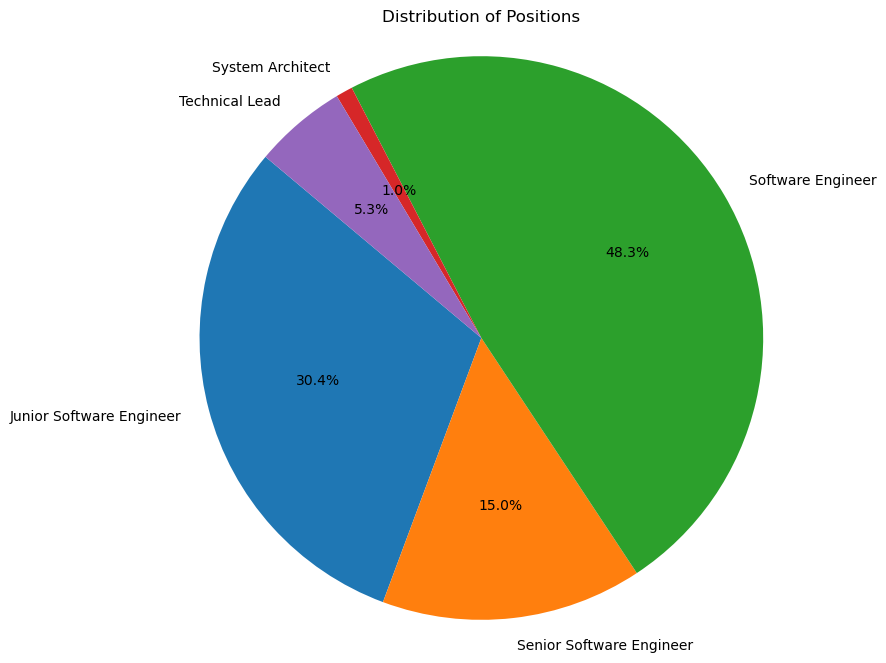

In [17]:
# Get the size of each group
group_sizes = grouped_data.size()

# Plotting
plt.figure(figsize=(8, 8))
plt.pie(group_sizes, labels=group_sizes.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Positions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show plot
plt.show()

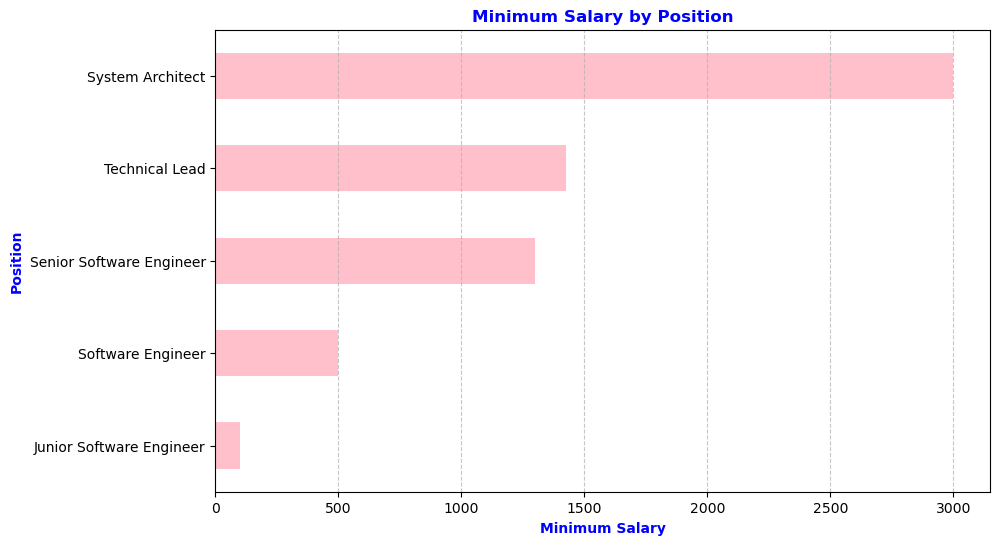

In [18]:
# Horizontal bar chart for the minimum salary of each position

import matplotlib.pyplot as plt

grouped_data = python_data.groupby("Посада")["Зарплата на місяць"].min().sort_values()

# Plotting
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='barh', color='pink')
plt.xlabel('Minimum Salary', color='blue', weight='bold')
plt.ylabel('Position', color='blue', weight='bold')
plt.title('Minimum Salary by Position',weight='bold', color='blue')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show plot
plt.show()

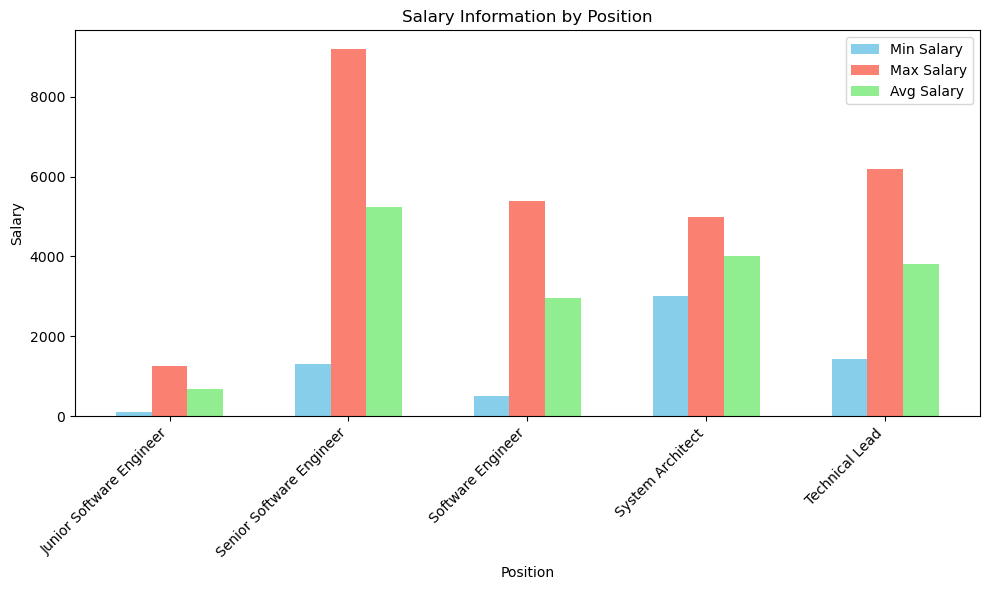

In [19]:
# Grouped bar chart where each position has three bars representing the minimum, maximum, and average salary

import matplotlib.pyplot as plt

# Data
positions = ['Junior Software Engineer', 'Senior Software Engineer', 'Software Engineer', 'System Architect', 'Technical Lead']
min_salary = [100, 1300, 500, 3000, 1425]
max_salary = [1250, 9200, 5400, 5000, 6200]
avg_salary = [675.0, 5250.0, 2950.0, 4000.0, 3812.5]

# Plotting
x = range(len(positions))
width = 0.2

plt.figure(figsize=(10, 6))

plt.bar(x, min_salary, width, label='Min Salary', color='skyblue')
plt.bar([i + width for i in x], max_salary, width, label='Max Salary', color='salmon')
plt.bar([i + width*2 for i in x], avg_salary, width, label='Avg Salary', color='lightgreen')

plt.xlabel('Position')
plt.ylabel('Salary')
plt.title('Salary Information by Position')
plt.xticks([i + width for i in x], positions, rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()